In [7]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [8]:
wine_dataset = load_wine()
dir(wine_dataset)
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [10]:
wine_dataset.target_names

wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
# create a pandas dataframe
data = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names )

# add column with the price (target)
data['CLASS'] = wine_dataset.target
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [12]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


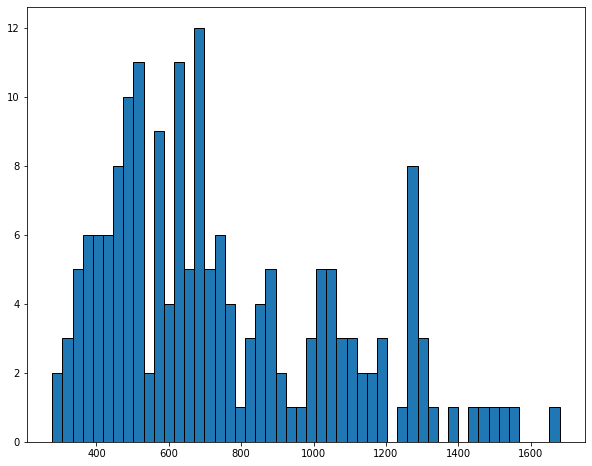

In [13]:
plt.figure(figsize=(10, 8))
plt.hist(data['proline'], bins= 50, ec= 'black')
plt.show()

In [14]:
data['proline'].skew()

0.7678217813897322

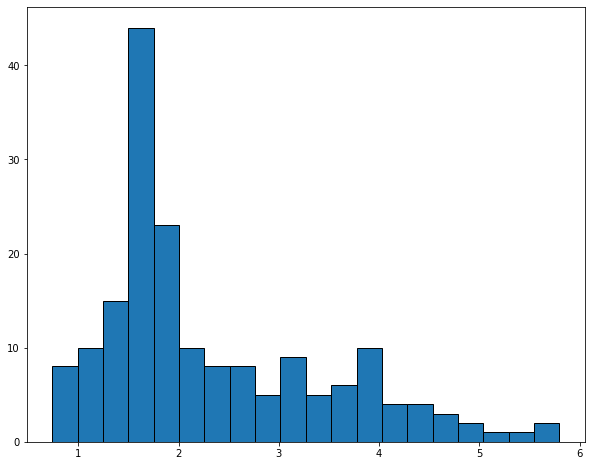

In [15]:
plt.figure(figsize=(10, 8))
plt.hist(data['malic_acid'], bins= 20, ec= 'black')
plt.show()

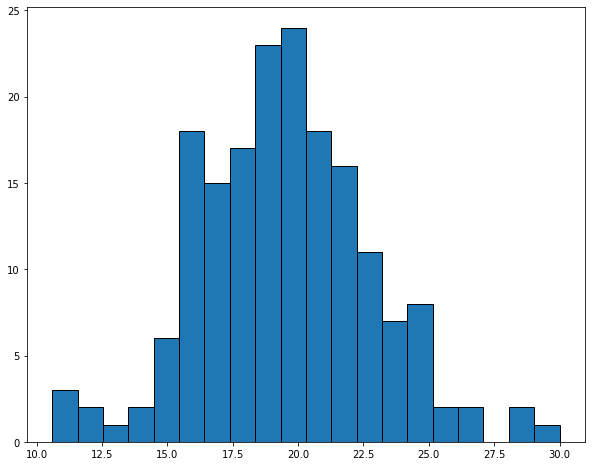

In [16]:
plt.figure(figsize=(10, 8))
plt.hist(data['alcalinity_of_ash'], bins= 20, ec= 'black')
plt.show()

In [17]:
data['alcalinity_of_ash'].skew()

0.21304688642645586

In [18]:
data.skew()

alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
CLASS                           0.107431
dtype: float64

In [19]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [20]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

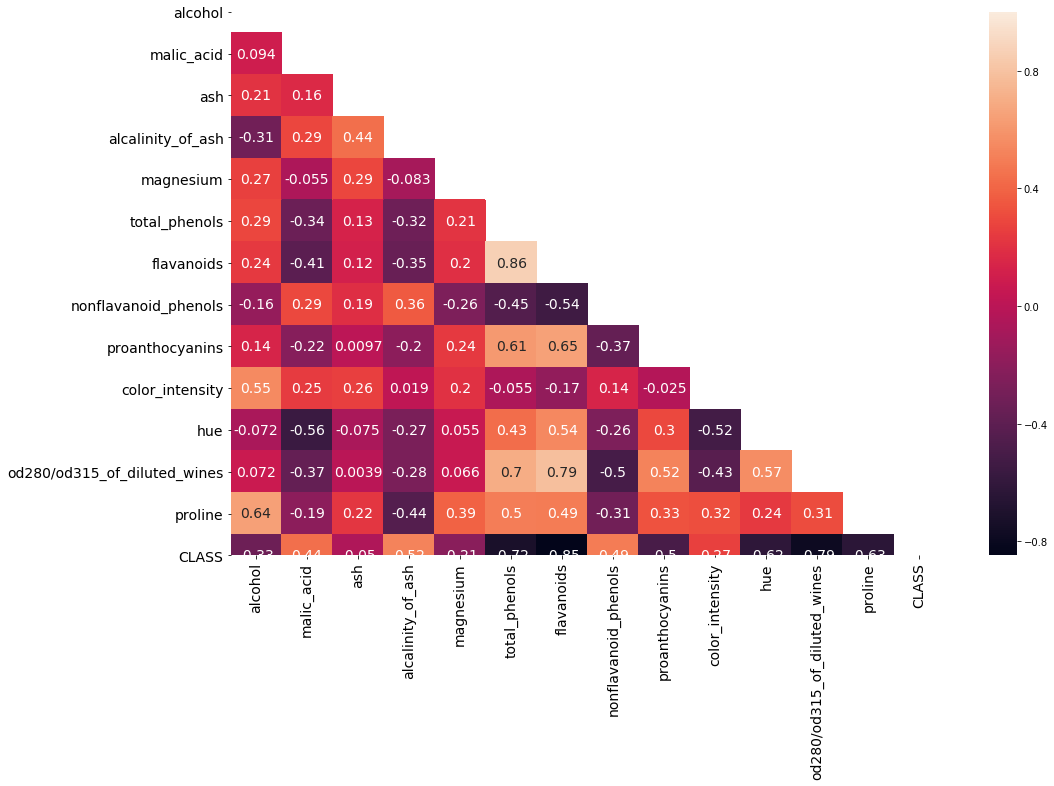

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

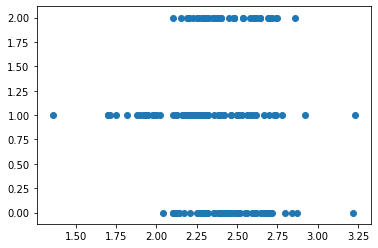

In [22]:
plt.scatter(data['ash'], data['CLASS'])
plt.show

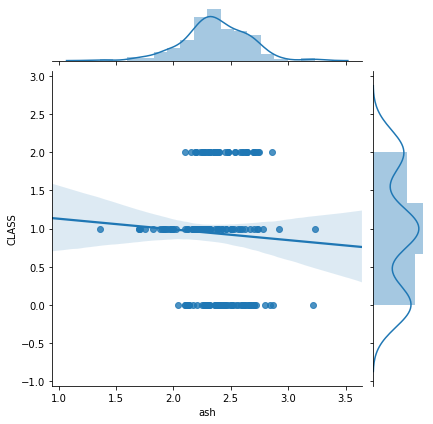

In [23]:
sns.jointplot(data['ash'], data['CLASS'], kind='reg')
plt.show()

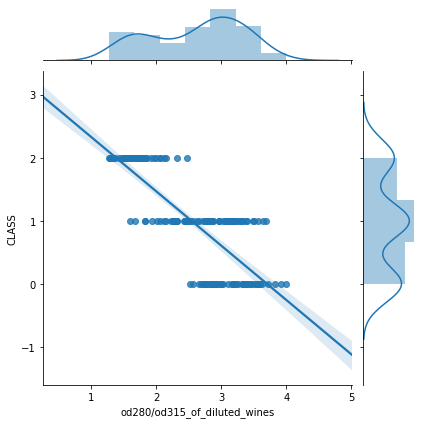

In [24]:
sns.jointplot(data['od280/od315_of_diluted_wines'], data['CLASS'], kind='reg')
plt.show()

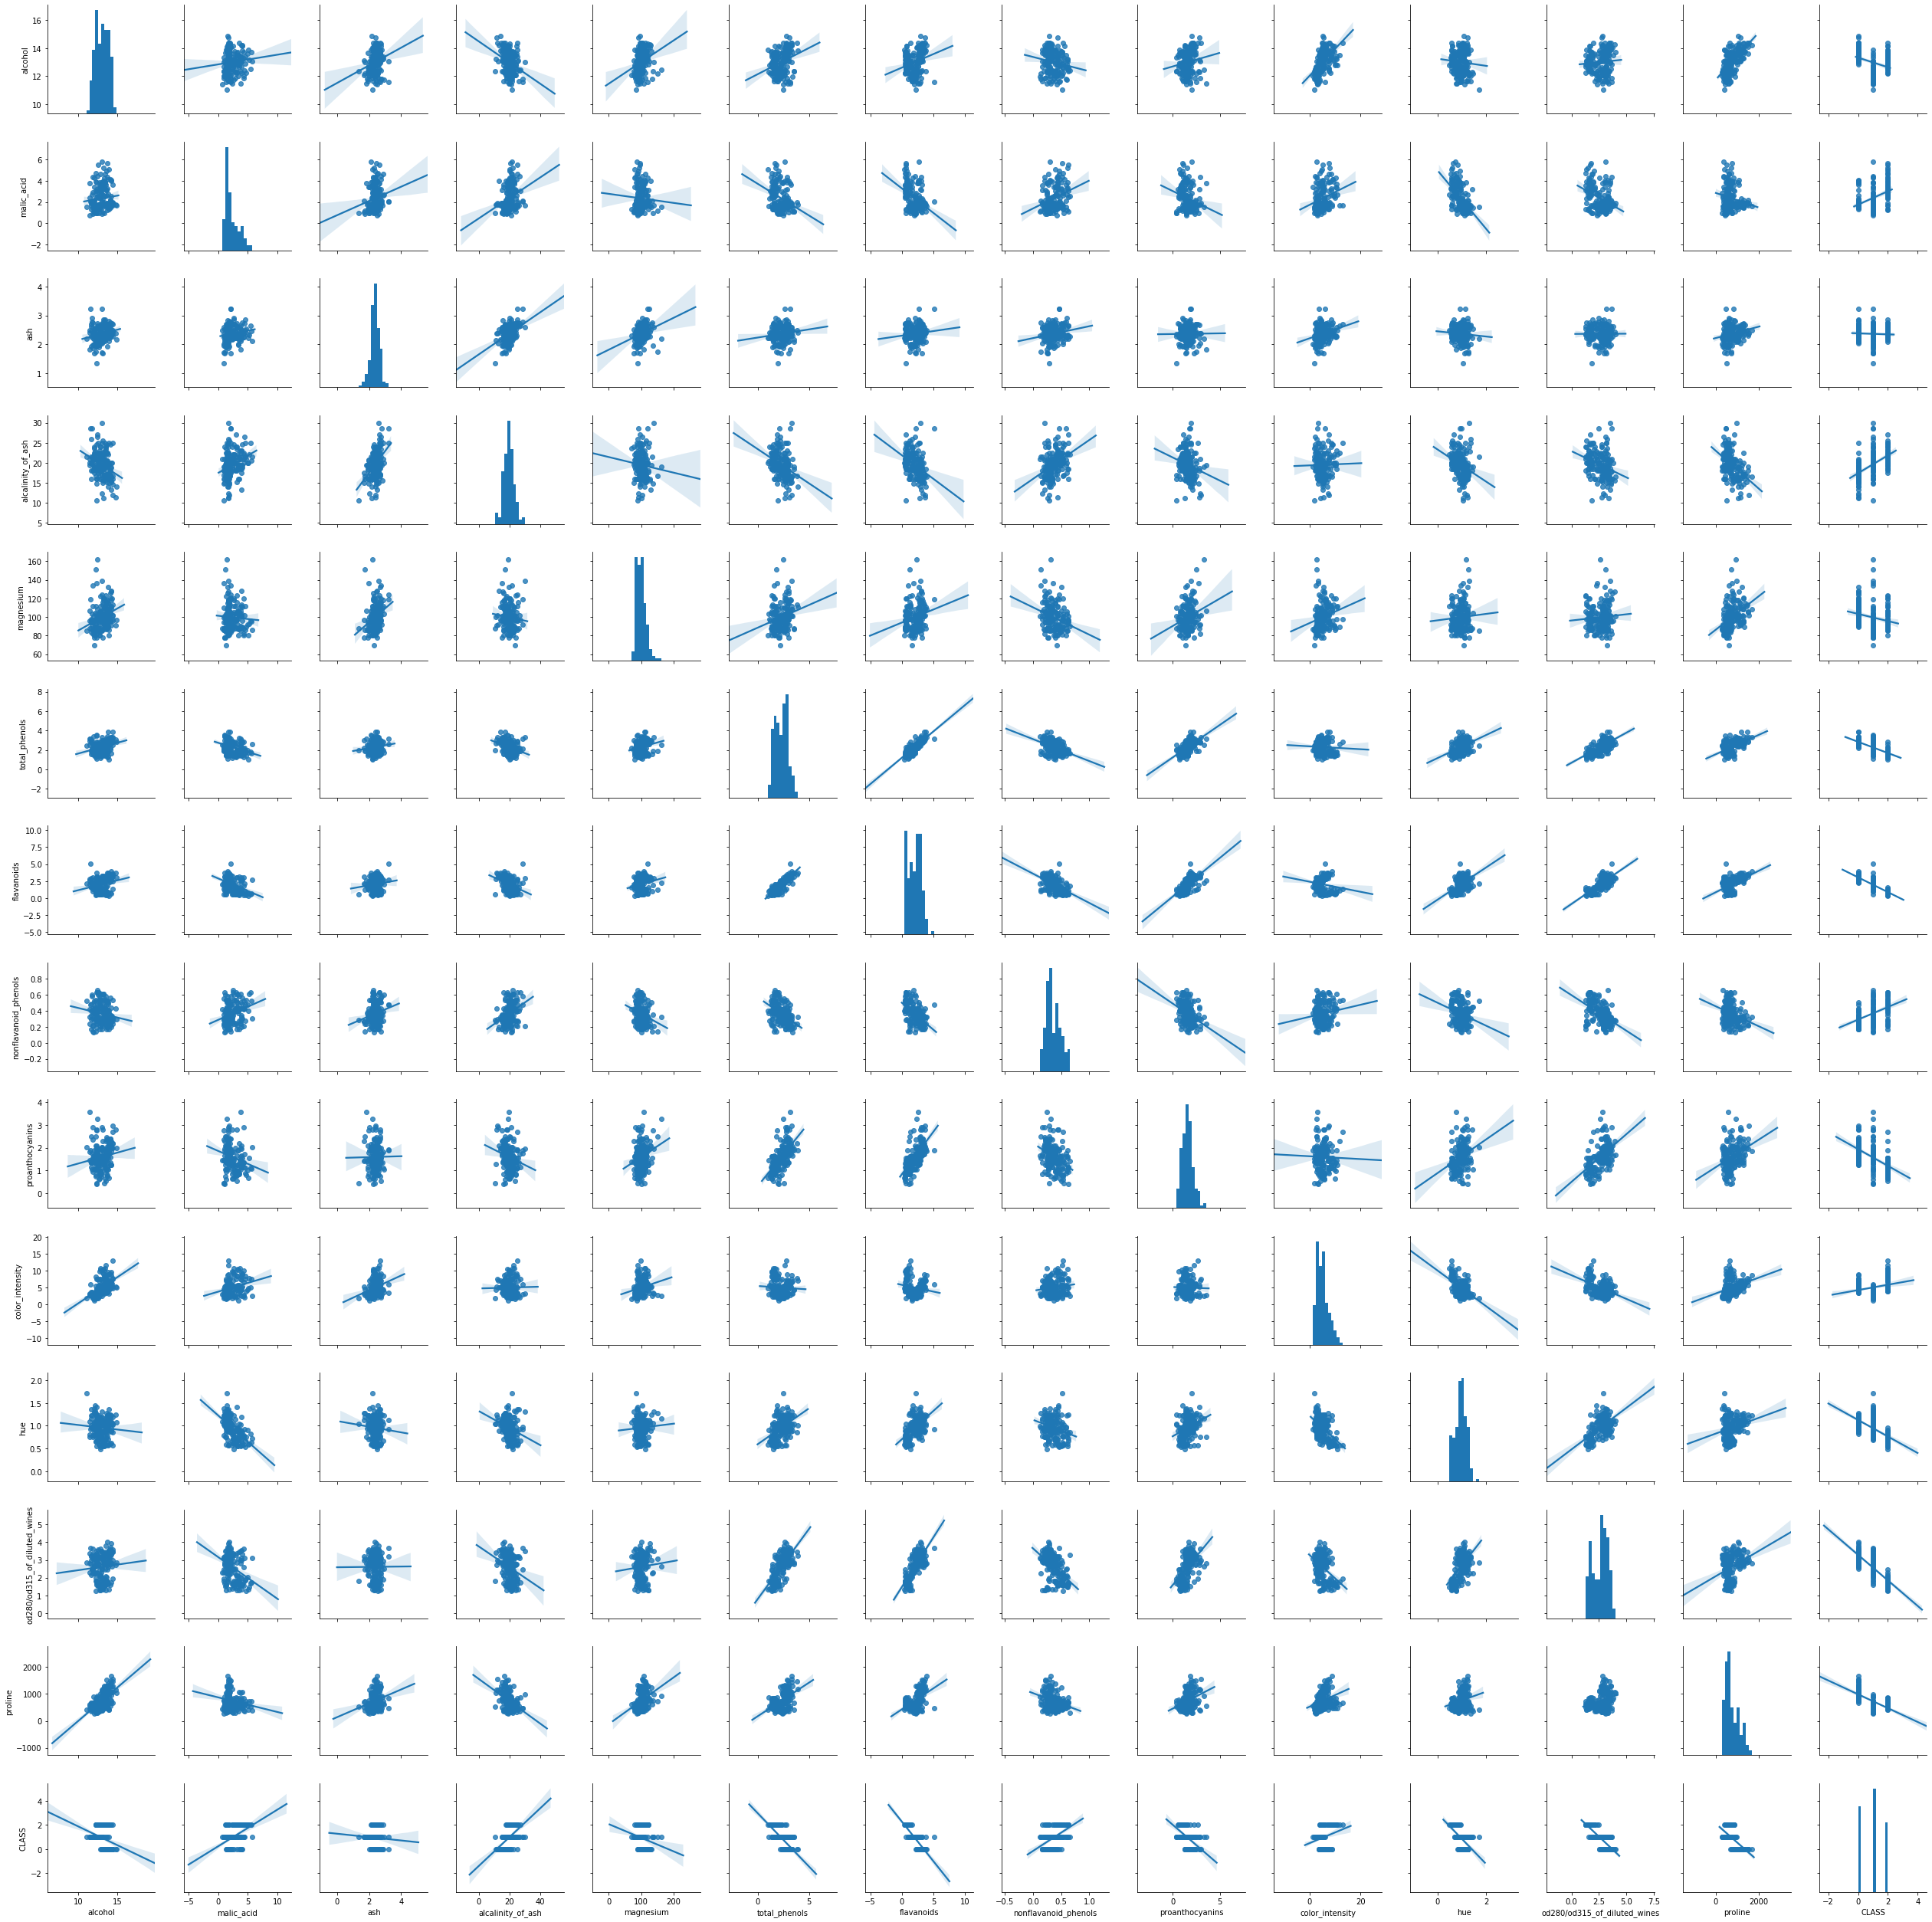

In [25]:
sns.pairplot(data, kind= 'reg')
plt.show()

In [26]:
Class = data['CLASS']
features= data.drop('CLASS', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, Class,
                                                    test_size= 0.2, random_state= 10)


In [27]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

# results.params
# results.pvalues
#print(X_incl_const)
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog= X_incl_const.values, exog_idx= i))
print(vif)

# .DataFrame({'coef_name': X_incl_const.columns, 'vif': vif })

pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3), 'vif-values': vif })

C:\Users\samee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[698.3523543951835, 2.368295513977627, 1.664532122762812, 1.9612303444170212, 2.269105388806081, 1.516619340479861, 4.549020599412472, 6.563263199846999, 1.723233517395695, 1.956828118718398, 3.355997633717495, 2.528006936774998, 3.9070692107508114, 3.2133398366112362]


,coef,p-values,vif-values
const,3.594151,0.000,698.352354
alcohol,-0.113428,0.006,2.368296
malic_acid,0.015654,0.531,1.664532
ash,-0.255492,0.036,1.961230
alcalinity_of_ash,0.038734,0.000,2.269105
magnesium,0.000983,0.615,1.516619
total_phenols,0.211743,0.005,4.549021
flavanoids,-0.376356,0.000,6.563263
nonflavanoid_phenols,-0.108655,0.640,1.723234
proanthocyanins,0.000317,0.996,1.956828


In [28]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

org_model = pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

print(results.bic)
results.rsquared

72.22445358726773


0.9040795679750925

In [29]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop('proanthocyanins', axis= 1)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

org_model = pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

print(results.bic)
results.rsquared

67.26865898536292


0.9040795460513968

In [30]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['proanthocyanins', 'nonflavanoid_phenols', 'magnesium', 'malic_acid'], axis= 1)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

org_model = pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

print(results.bic)
results.rsquared

53.47241447172076


0.9033531934793728

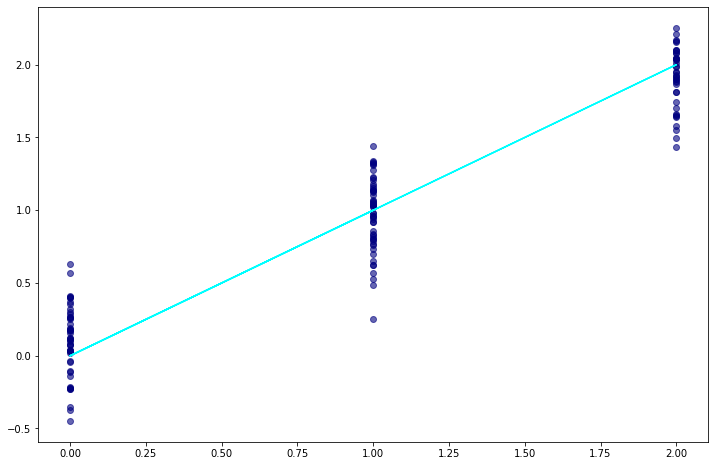

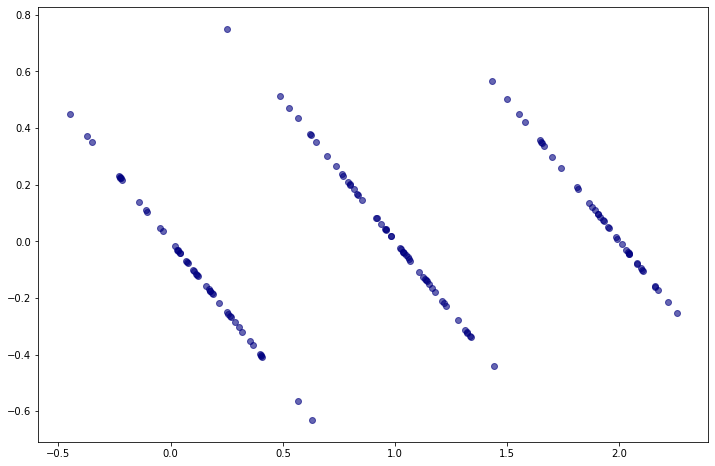

In [31]:
# Modified model: simplified (dropping four features)
Class = data['CLASS']
features= data.drop(['proanthocyanins', 'nonflavanoid_phenols', 'magnesium', 'malic_acid', 'CLASS'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, Class,
                                                    test_size= 0.2, random_state= 10)

#using statsmodel

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

# Residuals

# residuals = y_train - results.fittedvalues
# residuals
results.resid

# Graph of actual vs predicted prices

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,8))
plt.scatter(y_train, results.fittedvalues, c= 'navy', alpha= 0.6)
plt.plot(y_train, y_train, c = 'cyan')
plt.show()

# Graph of residuals vs predicted prices

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,8))
plt.scatter( results.fittedvalues, results.resid, c= 'navy', alpha= 0.6)

plt.show()

-0.0
0.287


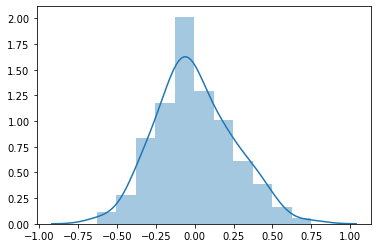

In [32]:
# Distribution of residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
print(resid_mean)
print(resid_skew)

sns.distplot(results.resid)
plt.show()

In [33]:
reduced_log_mse = results.mse_resid
reduced_log_rmse = np.sqrt(reduced_log_mse)
reduced_log_rsquared = results.rsquared
print(reduced_log_mse)
print(reduced_log_rsquared)
reduced_log_rmse

0.06474572927227466
0.9033531934793728


0.2544518211219457

In [34]:
print('1 s.d. is: ', np.sqrt(reduced_log_mse))
print('2 s.d. is: ', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('upper bound for 95% prediction is: ', upper_bound)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('lower bound for 95% prediction is: ', lower_bound)


1 s.d. is:  0.2544518211219457
2 s.d. is:  0.5089036422438914
upper bound for 95% prediction is:  3.910101023906047
lower bound for 95% prediction is:  2.892293739418264


In [35]:
features = data.drop(['proanthocyanins', 'nonflavanoid_phenols', 'magnesium', 'malic_acid', 'CLASS'], axis= 1)
#features_stats = features.mean().values.reshape(1, 9)
Class = wine_dataset.target
target = pd.DataFrame(Class, columns=['CLASS'])

regr = LinearRegression()
regr.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
features_stats = features.mean().values.reshape(1, 9)
print(features_stats)

def get_estimate(alcohol, ash, alcalinity_of_ash, total_phenols, flavanoids, color_intensity,
                 hue, diluted_wines, proline ):

    features_stats[0][0] = alcohol

    features_stats[0][1] = ash
    features_stats[0][2] = alcalinity_of_ash
    features_stats[0][3] = total_phenols
    features_stats[0][4] = flavanoids
    features_stats[0][5] = color_intensity
    features_stats[0][6] = hue
    features_stats[0][7] = diluted_wines
    features_stats[0][8] = proline

    
    estimate = regr.predict(features_stats)[0][0]
    return estimate

[[ 13.00061798   2.36651685  19.49494382   2.29511236   2.02926966
    5.05808988   0.95744944   2.61168539 746.89325843]]


In [49]:
get_estimate(14.13, 2.74, 24.5, 2.05, 0.76, 9.20, 0.61, 1.60, 560.0)

2.140709839611545